# Gestión de Datos

Taller 2 
Univerisdad Javeriana  
September, 2022  
  
Datasets:   

1. Mflix - Movies

In [ ]:
#!pip install --upgrade google-cloud-bigquery

In [ ]:
#!pip install pandas-gbq

In [ ]:
#!pip install db-dtypes

In [1]:
import pymongo

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

from google.cloud import bigquery
from google.oauth2 import service_account

### Extracting data

In [2]:
DB_NAME = "sample_mflix"
COLLECTION = "movies"

In [4]:
#Conexión a la base de datos de MongoDB
client = pymongo.MongoClient("mongodb+srv://user:<password>@cluster0.cawvcom.mongodb.net/?retryWrites=true&w=majority", server_api = pymongo.server_api.ServerApi('1'))

In [5]:
db = client[DB_NAME]

In [6]:
col = db[COLLECTION]

In [7]:
col.find_one({})

{'_id': ObjectId('573a1390f29313caabcd4135'),
 'plot': 'Three men hammer on an anvil and pass a bottle of beer around.',
 'genres': ['Short'],
 'runtime': 1,
 'cast': ['Charles Kayser', 'John Ott'],
 'num_mflix_comments': 0,
 'title': 'Blacksmith Scene',
 'fullplot': 'A stationary camera looks at a large anvil with a blacksmith behind it and one on either side. The smith in the middle draws a heated metal rod from the fire, places it on the anvil, and all three begin a rhythmic hammering. After several blows, the metal goes back in the fire. One smith pulls out a bottle of beer, and they each take a swig. Then, out comes the glowing metal and the hammering resumes.',
 'countries': ['USA'],
 'released': datetime.datetime(1893, 5, 9, 0, 0),
 'directors': ['William K.L. Dickson'],
 'rated': 'UNRATED',
 'awards': {'wins': 1, 'nominations': 0, 'text': '1 win.'},
 'lastupdated': '2015-08-26 00:03:50.133000000',
 'year': 1893,
 'imdb': {'rating': 6.2, 'votes': 1189, 'id': 5},
 'type': 'movie'

In [8]:
col.distinct("title")

['!Women Art Revolution',
 '#chicagoGirl: The Social Network Takes on a Dictator',
 '$',
 '$9.99',
 '$ellebrity',
 "'71",
 "'Doc'",
 "'Master Harold'... and the Boys",
 "'Pimpernel' Smith",
 "'R Xmas",
 "'Round Midnight",
 "'Til Madness Do Us Part",
 "'Twas the Night",
 "'night, Mother",
 '(500) Days of Summer',
 '(T)ERROR',
 '(Untitled)',
 '*batteries not included',
 '...All the Marbles',
 '...And God Created Woman',
 '...And Justice for All.',
 '009 Re: Cyborg',
 '06/05',
 '1',
 '1, 2, 3, Freeze',
 '1,000 Times Good Night',
 '1-900',
 '1. Mai',
 '10',
 '10 Cent Pistol',
 '10 Items or Less',
 '10 MPH',
 '10 Minutes',
 '10 Mountains 10 Years',
 '10 Questions for the Dalai Lama',
 '10 Things I Hate About You',
 '10%: What Makes a Hero?',
 '10,000 Black Men Named George',
 '10.000 Km',
 '10.5',
 '10.5: Apocalypse',
 '100 Bloody Acres',
 '100 Girls',
 '100% Love',
 '1001 Grams',
 '101 Dalmatians',
 "101 Dalmatians II: Patch's London Adventure",
 '101 Reykjavèk',
 '102 Dalmatians',
 '102 M

In [9]:
col.count_documents({})

23530

### Pregunta 1
El director que más premios ha ganado por género

In [10]:
#Consulta a base de datos MongoDB
# Con :0 al campo se le indica a Mongo que NO debe traer la columna
# Con :1 al campo se le indica a Mongo que debe traer la columna
result = col.find({}, {"_id": 0, "awards.wins": 1, "directors":1, "genres":1 })

In [11]:
df = pd.json_normalize(result).rename(columns = {"directors":"directors", "awards.wins": "wins", "genres":"genres"})

In [12]:
df.head()

,genres,directors,wins
0,[Short],[William K.L. Dickson],1
1,"[Short, Western]",[Edwin S. Porter],1
2,"[Short, Drama, Fantasy]",[Harold M. Shaw],1
3,"[Short, Drama]",[D.W. Griffith],1
4,"[Animation, Short, Comedy]","[Winsor McCay, J. Stuart Blackton]",1


In [13]:
res_directors = df.explode("directors")

In [15]:
res = res_directors.explode("genres")

In [16]:
res.head()

,genres,directors,wins
0,Short,William K.L. Dickson,1
1,Short,Edwin S. Porter,1
1,Western,Edwin S. Porter,1
2,Short,Harold M. Shaw,1
2,Drama,Harold M. Shaw,1


In [17]:
res['wins'].unique()

array([  1,   2,   0,   3,   5,   6,   7,   4,  10,  12,  19,   8,   9,
        11,  21,  18,  14,  16,  13,  17,  15,  23,  22,  31,  32,  25,
        33,  24,  30,  28,  35,  27,  36,  20,  44,  29,  43,  54,  39,
        37,  42,  26,  34,  48,  56,  46,  69,  81,  64,  68,  79,  57,
        49,  66,  97,  52, 127,  59, 114,  83,  70,  38,  50, 175, 105,
        41, 120,  51,  63,  84,  58, 115,  87,  45,  61,  60,  40, 111,
        74,  53,  77, 108,  73, 138, 133, 145,  80, 106,  75,  93,  67,
        71, 102, 144, 119, 172, 109,  88, 130,  85,  82, 161,  55,  98,
        78,  96, 185, 100, 171,  47, 162, 231,  86, 104,  91, 267, 146,
        62, 210,  90], dtype=int64)

In [18]:
res.shape

(55276, 3)

In [20]:
res.dtypes

genres       object
directors    object
wins          int64
dtype: object

In [21]:
res.sample(5)

,genres,directors,wins
7950,Drama,Kasi Lemmons,11
8282,Drama,Bill Condon,42
22182,Animation,Vinton Heuck,1
16429,Comedy,Will Gluck,1
20330,Drama,Mikael Marcimain,8


### Exploring and cleaning data

In [22]:
res["directors"].value_counts(dropna = False)

NaN                593
Woody Allen         83
Takashi Miike       81
John Huston         79
John Ford           75
                  ... 
Ole Schell           1
Sara Ziff            1
Kelly Duane          1
Katie Galloway       1
Marcin Koszalka      1
Name: directors, Length: 11537, dtype: int64

In [23]:
res.dropna()

,genres,directors,wins
0,Short,William K.L. Dickson,1
1,Short,Edwin S. Porter,1
1,Western,Edwin S. Porter,1
2,Short,Harold M. Shaw,1
2,Drama,Harold M. Shaw,1
...,...,...,...
23527,Drama,Anne èmond,0
23528,Documentary,Chantal Akerman,0
23529,Comedy,Ed Blum,0
23529,Drama,Ed Blum,0


In [24]:
res.loc[df["wins"] == "", "wins"] = "0"

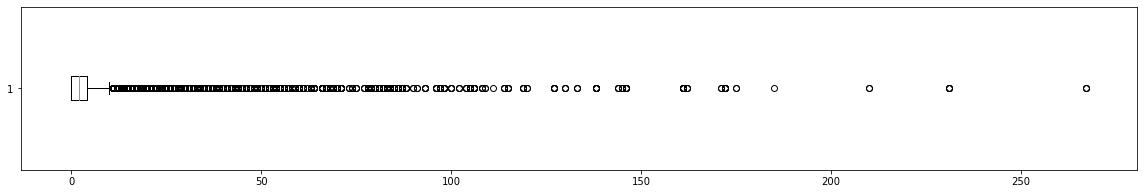

In [25]:
plt.figure(figsize = (20, 3))
plt.boxplot(res["wins"], vert = False)
plt.show()

### Transforming data

In [26]:
res["directors"] = res["directors"].astype(str)

In [27]:
res["genres"] = res["genres"].astype(str)

In [28]:
res.groupby(['directors','genres'], as_index=True).sum().sort_values('wins',ascending = False)
df_grouped = res.groupby(['directors','genres'], as_index=True).sum().sort_values('wins',ascending = False)

In [29]:
res.sample(5)

,genres,directors,wins
21672,Romance,Amma Asante,13
22976,Mystery,Fruit Chan,4
896,Crime,Emilio Fernèndez,0
12406,Action,Kamal Haasan,1
23280,History,Rèdiger Suchsland,1


### Loading data

In [30]:
credentials = service_account.Credentials.from_service_account_file("./javeriana-dataprep.json", scopes = ["https://www.googleapis.com/auth/cloud-platform"])

In [31]:
client = bigquery.Client(credentials = credentials, project = credentials.project_id)

In [32]:
# Creating the job config
job_config = bigquery.LoadJobConfig(
    schema = [
        # Supported datatypes: https://cloud.google.com/bigquery/docs/reference/standard-sql/data-types
        bigquery.SchemaField("genres", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("directors", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("wins", bigquery.enums.SqlTypeNames.INT64)
    ],
    # Drod and re-create table, if exist
    write_disposition = "WRITE_TRUNCATE",
)

In [33]:
BQ_TABLE_NAME = "dataprep.listings_directors_wins_onc"

In [34]:
# Sending the job to BigQuery
job = client.load_table_from_dataframe(
    df_grouped, BQ_TABLE_NAME, job_config = job_config
)

job.result()

LoadJob<project=javeriana-dataprep, location=us-central1, id=c8a56e0c-2caf-40cf-9ed7-f4c8f6a37497>

In [35]:
# Verifying if table was successfully created or updated
table = client.get_table(BQ_TABLE_NAME)

print("Loaded {} rows and {} columns to {}".format(table.num_rows, len(table.schema), BQ_TABLE_NAME))

Loaded 33576 rows and 3 columns to dataprep.listings_directors_wins_onc


In [36]:
query = """SELECT * FROM `javeriana-dataprep.dataprep.listings_directors_wins_onc`"""

pd.read_gbq(query, credentials = credentials)

,directors,genres,wins
0,Eli Roth,War,138
1,Quentin Tarantino,War,138
2,Steven Spielberg,War,126
3,nan,War,109
4,Guillermo del Toro,War,106
...,...,...,...
33571,Laurent Bècue-Renard,Documentary,0
33572,Kevin Pollak,Documentary,0
33573,Kevin Pang,Documentary,0
33574,Kevin Mazur,Documentary,0


### Pregunta 2
¿Cuantas peliculas se han lanzado por año?

### Extracting data

In [37]:
#Consulta a base de datos MongoDB
# Con :0 al campo se le indica a Mongo que NO debe traer la columna
# Con :1 al campo se le indica a Mongo que debe traer la columna
result2 = col.find({}, {"_id": 0, "title": 1, "year": 1})

In [38]:
#Llevar resultado de MongoDB a un dataFrame de Pandas
#df = pd.json_normalize(result).rename(columns = {"title": "name", "genre.0": "genre", "awards.wins": "awards"})
df2 = pd.json_normalize(result2)

In [39]:
df2.shape

(23530, 2)

In [40]:
df2.dtypes

title    object
year     object
dtype: object

In [41]:
df2.sample(5)

,title,year
12789,A Hole in My Heart,2004
2876,Roma,1972
10071,Pay It Forward,2000
17695,Harlan: In the Shadow of Jew Suess,2008
13320,Breakfast on Pluto,2005


### Exploring and cleaning data

In [42]:
df2["title"].value_counts(dropna = False)

Jane Eyre            6
The Journey          6
The Terrorist        6
The Hole             6
Hamlet               6
                    ..
City of Industry     1
Chasing Amy          1
Happy Together       1
The Manson Family    1
No Home Movie        1
Name: title, Length: 21641, dtype: int64

In [43]:
df2["year"].value_counts(dropna = False)

2013     1220
2014     1147
2012     1109
2011     1040
2009      990
         ... 
1891        1
1999è       1
1995è       1
2000è       1
1893        1
Name: year, Length: 134, dtype: int64

In [44]:
pd.unique(df2["year"])

array([1893, 1903, 1912, 1909, 1911, 1913, 1914, 1915, 1916, 1917, 1918,
       1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
       1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1943, 2001, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1954, 1953, 1955, 1956, 1957, 1959, 1984, 1958, 1960,
       1961, 1963, 1962, 1965, 1964, 1966, 1967, 1968, 1981, 1969, 1970,
       1971, 1989, 1990, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1982, '1981è', 1983, 1985, 1987, 1986, '1986è', '1987è',
       1988, '1988è', 1991, 2002, 1992, 1993, 1995, '1994è1998', 1994,
       1996, 1997, 1998, '1996è', 2005, '1997è', 2000, 2003, 1999,
       '1995è', 2006, 1896, 2010, 2004, 1894, '2000è', 2008, 2007,
       '1999è', 1891, 2009, 2012, 2013, 2015, 2011, '2002è', '2003è',
       2014, '2005è', '2006è', '2006è2012', '2006è2007', '2007è', '2009è',
       '2011è', '2010è', '2012è', 2016, '2014è'], dtype=object)

In [45]:
#Dado que en la columna de year encontramos datos que no corresponden a años por que tienen simbolos al final, 
#procedemos a tomar los primeros 4 caracteres que corresponden al año.
def first_four(x):
    return [str(i)[0:4] for i in x]

In [46]:
df2["year"] = first_four(df2["year"])

In [47]:
pd.unique(df2["year"])

array(['1893', '1903', '1912', '1909', '1911', '1913', '1914', '1915',
       '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923',
       '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931',
       '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939',
       '1940', '1941', '1942', '1943', '2001', '1944', '1945', '1946',
       '1947', '1948', '1949', '1950', '1951', '1952', '1954', '1953',
       '1955', '1956', '1957', '1959', '1984', '1958', '1960', '1961',
       '1963', '1962', '1965', '1964', '1966', '1967', '1968', '1981',
       '1969', '1970', '1971', '1989', '1990', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1982', '1983',
       '1985', '1987', '1986', '1988', '1991', '2002', '1992', '1993',
       '1995', '1994', '1996', '1997', '1998', '2005', '2000', '2003',
       '1999', '2006', '1896', '2010', '2004', '1894', '2008', '2007',
       '1891', '2009', '2012', '2013', '2015', '2011', '2014', '2016'],
     

In [51]:
df2["year"].info()

AttributeError: 'Series' object has no attribute 'info'

In [50]:
df2["year"] = df2["year"].astype(str).astype(int)

### Transforming data

In [52]:
df2["count"] = 1

In [53]:
df_grouped2 = df2.groupby(["year"]).agg({"count": "count"}).reset_index()

In [54]:
df_grouped2.sample(5)

,year,count
79,1984,211
37,1942,36
15,1920,5
26,1931,24
66,1971,116


In [55]:
df_grouped2

,year,count
0,1891,1
1,1893,1
2,1894,1
3,1896,2
4,1903,1
...,...,...
107,2012,1112
108,2013,1220
109,2014,1149
110,2015,485


In [56]:
df_grouped2.shape

(112, 2)

In [57]:
df2.dtypes

title    object
year      int32
count     int64
dtype: object

### Loading data

In [58]:
# Creating the job config
job_config2 = bigquery.LoadJobConfig(
    schema = [
        # Supported datatypes: https://cloud.google.com/bigquery/docs/reference/standard-sql/data-types
        bigquery.SchemaField("year", bigquery.enums.SqlTypeNames.INT64),
        bigquery.SchemaField("count", bigquery.enums.SqlTypeNames.INT64)
    ],
    # Drod and re-create table, if exist
    write_disposition = "WRITE_TRUNCATE",
)

In [59]:
BQ_TABLE_NAME = "dataprep.mflix_movies_per_year_onc"

In [60]:
# Sending the job to BigQuery
job = client.load_table_from_dataframe(
    df_grouped2, BQ_TABLE_NAME, job_config = job_config2
)

job.result()

LoadJob<project=javeriana-dataprep, location=us-central1, id=c00563c3-cfa7-4abb-86f7-49b4f294040c>

In [61]:
query2 = """SELECT * FROM `javeriana-dataprep.dataprep.mflix_movies_per_year_onc`"""

In [62]:
df_mov_year=pd.read_gbq(query2, credentials = credentials)

In [63]:
df_mov_year.shape

(112, 2)

In [64]:
#Dado que se tienen 112 diferentes años de peliculas se decide graficar para aquellos años despues del año 2000
df_mov_year_2000 = df_mov_year[df_mov_year["year"] > 2000]

In [65]:
df_mov_year_2000

,year,count
7,2016,1
27,2011,1042
58,2006,848
61,2012,1112
70,2007,874
81,2014,1149
86,2001,645
90,2002,656
91,2003,657
97,2013,1220


<AxesSubplot:title={'center':'Movies per Year after 2000'}, xlabel='year', ylabel='count'>

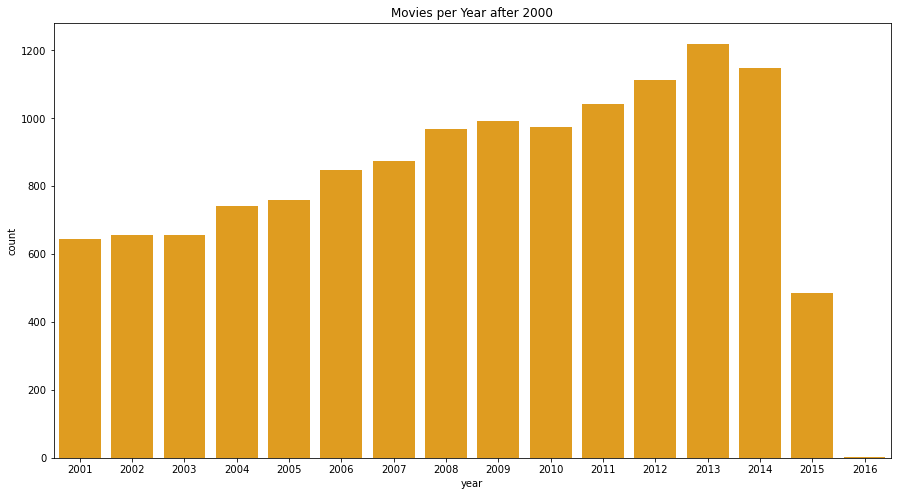

In [66]:
#
fig, ax = plt.subplots(figsize=(15, 8))
plt.title("Movies per Year after 2000")
sns.barplot(ax = ax, data = df_mov_year_2000, x='year', y='count', color = 'orange')

### Pregunta 3
¿Cual es el tiempo promedio de duración de cada uno de los generos?

### Extracting data

In [67]:
#Consulta a base de datos MongoDB
# Con :0 al campo se le indica a Mongo que NO debe traer la columna
# Con :1 al campo se le indica a Mongo que debe traer la columna
result3 = col.find({}, {"_id": 0, "genres":1 , "runtime":1, "title":1})

In [68]:
df3 = pd.json_normalize(result3)

In [69]:
df3.shape

(23530, 3)

In [70]:
df3.dtypes

genres      object
runtime    float64
title       object
dtype: object

In [71]:
df3.sample(5)

,genres,runtime,title
5810,"[Biography, Drama]",115.0,Korczak
14044,"[Crime, Horror, Thriller]",105.0,Borderland
17592,"[Documentary, Music]",105.0,Don't Stop Believin': Everyman's Journey
23139,"[Action, Crime, Thriller]",111.0,A Hard Day
17994,"[Drama, Romance]",122.0,I Give My First Love to You


In [72]:
#Abrir las listas de los generos y dejar solamente un genero por fila
res_3 = df3.explode("genres")

In [73]:
res_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49876 entries, 0 to 23529
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   genres   49760 non-null  object 
 1   runtime  49126 non-null  float64
 2   title    49876 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


### Exploring and cleaning data

In [74]:
#Checkeo de valores nulos
res_3.isnull().sum()

genres     116
runtime    750
title        0
dtype: int64

In [75]:
#Creando variables donde solamente se tengan netamente los valores nulos de cada una de estas columnas. 
gen_null = pd.isnull(res_3["genres"])
rt_null = pd.isnull(res_3["runtime"])

In [76]:
res_3[rt_null]

,genres,runtime,title
802,Comedy,NaN,Mi adorado Juan
1881,Drama,NaN,Il fornaretto di Venezia
2402,Comedy,NaN,La pecora nera
2406,Drama,NaN,The Protagonists
2610,Drama,NaN,Al-ikhtiyar
...,...,...,...
23495,Thriller,NaN,Un monstruo de mil cabezas
23497,Drama,NaN,Techo y comida
23508,Comedy,NaN,Se Dio vuole
23517,Animation,NaN,The Magic Mountain


In [77]:
#Reemplazando valores vacios en columna genres con no especificado
res_3["genres"].fillna("Not specified", inplace= True)

In [78]:
#Reemplazando valores vacios en columna run time con 0
res_3["runtime"].fillna(0, inplace= True)

In [79]:
res_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49876 entries, 0 to 23529
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   genres   49876 non-null  object 
 1   runtime  49876 non-null  float64
 2   title    49876 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


### Transforming data

In [80]:
#Agrupando por generos y sacando la media de cada uno de ellos. 
df_mov_rt = res_3.groupby(by = ["genres"]).mean().round(2)

### Loading data

In [81]:
# Creating the job config
job_config3 = bigquery.LoadJobConfig(
    schema = [
        # Supported datatypes: https://cloud.google.com/bigquery/docs/reference/standard-sql/data-types
        bigquery.SchemaField("genres", bigquery.enums.SqlTypeNames.STRING),
        bigquery.SchemaField("runtime", bigquery.enums.SqlTypeNames.FLOAT),
    ],
    # Drod and re-create table, if exist
    write_disposition = "WRITE_TRUNCATE",
)

In [82]:
BQ_TABLE_NAME3 = "dataprep.mflix_runtime_genres_ONC"

In [83]:
# Sending the job to BigQuery
job = client.load_table_from_dataframe(
    df_mov_rt, BQ_TABLE_NAME3, job_config = job_config3
)

job.result()

LoadJob<project=javeriana-dataprep, location=us-central1, id=10d937b0-8045-4c49-aa41-782d9fceea5e>

In [84]:
# Verifying if table was successfully created or updated
table = client.get_table(BQ_TABLE_NAME3)

print("Loaded {} rows and {} columns to {}".format(table.num_rows, len(table.schema), BQ_TABLE_NAME3))

Loaded 26 rows and 2 columns to dataprep.mflix_runtime_genres_ONC


In [85]:
query3 = """SELECT * FROM `javeriana-dataprep.dataprep.mflix_runtime_genres_ONC`"""

In [86]:
df3 = pd.read_gbq(query3, credentials = credentials)

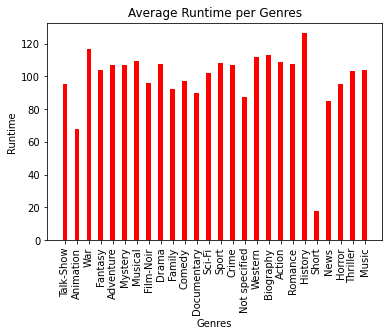

In [87]:
plt.bar(df3["genres"], df3["runtime"], color ='red',
        width = 0.4)

plt.xlabel("Genres")
plt.ylabel("Runtime")
plt.title("Average Runtime per Genres")
plt.xticks(rotation=90)
plt.show()